In [1]:
import numpy as np
import jax
from jax.scipy import stats
import jax.numpy as jnp

import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az

In [24]:
def compare_plot_poster():
    samples = jnp.load('banana_coupling_kld_elu_2.npz', allow_pickle=True)
    ess = samples['ess_samples'].item()
    atess2 = samples['atess_samples'].item()
    nuts = samples['nuts_samples'].item()
    neutra = samples['neutra_samples'].item()
    samples = jnp.load('banana_coupling_kld_elu_1.npz', allow_pickle=True)
    atess1 = samples['atess_samples'].item()
    samples = jnp.load('banana_coupling_kld_elu_0.npz', allow_pickle=True)
    atess0 = samples['atess_samples'].item()
    
    np.random.seed(0)
#     clip = ((-8, 8), (-5, 15))
    clip=None
    c, n = ess["x1"].shape
    x1 = np.random.normal(0., np.sqrt(8), size=c * n * 10)
    x2 = np.random.normal(1/4 * x1**2 , 1.)
    
    fig, ax = plt.subplots(1, 6, figsize=(25, 3), sharex=True, sharey=True)
    ax[0].set_title("(T)ESS samples")
    sns.kdeplot(x=x1, y=x2, ax=ax[0], color='k', clip=clip)
    sns.kdeplot(x=ess["x1"].reshape(-1), y=ess["x2"].reshape(-1), ax=ax[0], clip=clip)
    ax[1].set_title("ATESS (h=0) samples")
    sns.kdeplot(x=x1, y=x2, ax=ax[1], color='k', clip=clip)
    sns.kdeplot(x=atess0["x1"].reshape(-1), y=atess0["x2"].reshape(-1), ax=ax[1], clip=clip)
    ax[2].set_title("ATESS (h=1) samples")
    sns.kdeplot(x=x1, y=x2, ax=ax[2], color='k', clip=clip)
    sns.kdeplot(x=atess1["x1"].reshape(-1), y=atess1["x2"].reshape(-1), ax=ax[2], clip=clip)
    ax[3].set_title("ATESS (h=2) samples")
    sns.kdeplot(x=x1, y=x2, ax=ax[3], color='k', clip=clip)
    sns.kdeplot(x=atess2["x1"].reshape(-1), y=atess2["x2"].reshape(-1), ax=ax[3], clip=clip)
    ax[4].set_title("NUTS samples")
    sns.kdeplot(x=x1, y=x2, ax=ax[4], color='k', clip=clip)
    sns.kdeplot(x=nuts["x1"].reshape(-1), y=nuts["x2"].reshape(-1), ax=ax[4], clip=clip)
    ax[5].set_title("NeuTra samples")
    sns.kdeplot(x=x1, y=x2, ax=ax[5], color='k', clip=clip)
    sns.kdeplot(x=neutra["x1"].reshape(-1), y=neutra["x2"].reshape(-1), ax=ax[5], clip=clip)

    ax[3].set_ylim(-5, 15)
    ax[3].set_xlim(-8, 8)

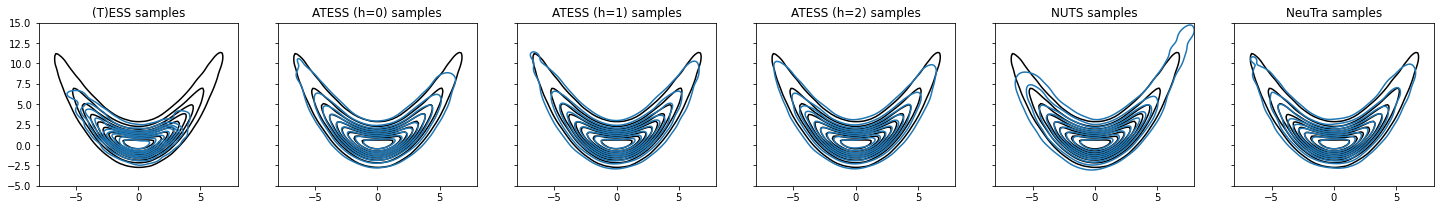

In [25]:
compare_plot_poster()

In [13]:
samples = jnp.load('banana_coupling_kld_elu_1.npz', allow_pickle=True)

In [14]:
ess = samples['ess_samples'].item()
atess = samples['atess_samples'].item()
atess_flow = samples['atess_flow_samples'].item()
nuts = samples['nuts_samples'].item()
neutra = samples['neutra_samples'].item()
neutra_flow = samples['neutra_flow_samples'].item()

In [15]:
def compare_plot_contour(logprob, ess, atess, nuts, neutra):
#     a, b, c, d = -6, 6, -5, 10
# #     a, b, c, d = -10, 10, -5, 20
#     x1 = jnp.linspace(a, b, 1000)
#     x2 = jnp.linspace(c, d, 1000)
#     y = jax.vmap(
#         jax.vmap(lambda x1, x2: jnp.exp(logprob({"x1": x1, "x2": x2})), (0, None)),
#         (None, 0),
#     )(x1, x2)
    np.random.seed(0)
    clip = ((-8, 8), (-5, 15))
    c, n = ess["x1"].shape
    x1 = np.random.normal(0., np.sqrt(8), size=c * n)
    x2 = np.random.normal(1/4 * x1**2 , 1.)
    
    fig, ax = plt.subplots(1, 4, figsize=(17, 3), sharex=True, sharey=True)
    ax[0].set_title("(T)ESS samples")
    sns.kdeplot(x=x1, y=x2, ax=ax[0], color='k', clip=clip)
    sns.kdeplot(x=ess["x1"].reshape(-1), y=ess["x2"].reshape(-1), ax=ax[0], clip=clip)
#     ax[0].contour(x1, x2, y, levels=4, colors="k")
    ax[1].set_title("ATESS samples")
    sns.kdeplot(x=x1, y=x2, ax=ax[1], color='k', clip=clip)
    sns.kdeplot(x=atess["x1"].reshape(-1), y=atess["x2"].reshape(-1), ax=ax[1], clip=clip)
#     ax[1].contour(x1, x2, y, levels=4, colors="k")
    ax[2].set_title("NUTS samples")
    sns.kdeplot(x=x1, y=x2, ax=ax[2], color='k', clip=clip)
    sns.kdeplot(x=nuts["x1"].reshape(-1), y=nuts["x2"].reshape(-1), ax=ax[2], clip=clip)
#     ax[2].contour(x1, x2, y, levels=4, colors="k")
    ax[3].set_title("NeuTra samples")
    sns.kdeplot(x=x1, y=x2, ax=ax[3], color='k', clip=clip)
    sns.kdeplot(x=neutra["x1"].reshape(-1), y=neutra["x2"].reshape(-1), ax=ax[3], clip=clip)
#     ax[3].contour(x1, x2, y, levels=4, colors="k")

In [6]:
def banana(x1, x2):
    """Banana density"""
    return stats.norm.logpdf(x1, 0.0, jnp.sqrt(8.0)) + stats.norm.logpdf(
        x2, 1 / 4 * x1**2, 1.0
    )
banana_fn = lambda x: banana(**x)

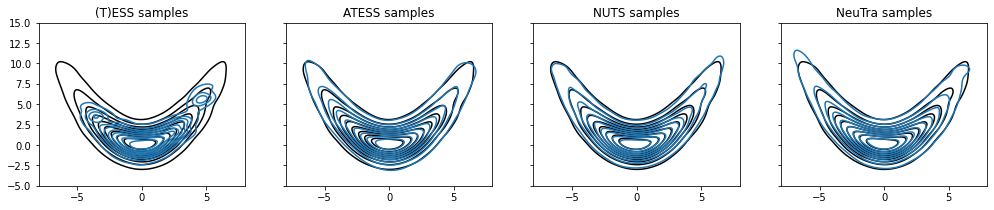

In [7]:
#epoch 0
compare_plot_contour(banana_fn, ess, atess, nuts, neutra)

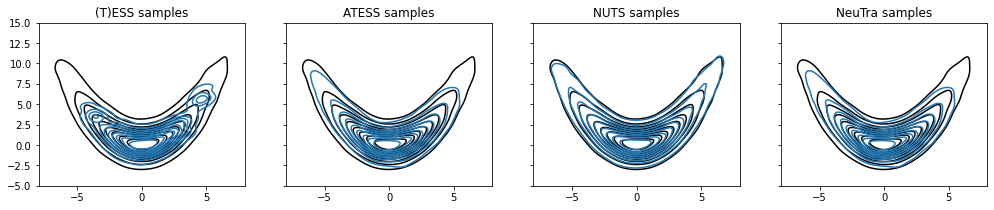

In [8]:
#epoch 0 (flow)
compare_plot_contour(banana_fn, ess, atess_flow, nuts, neutra_flow)

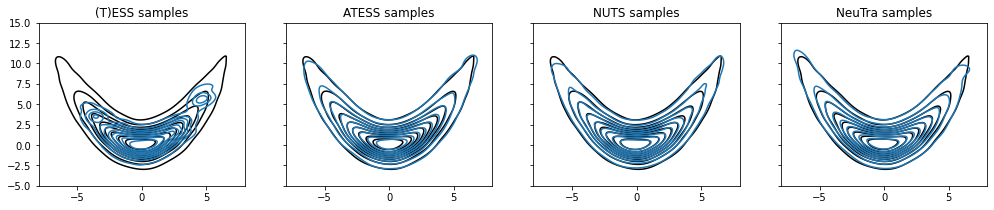

In [16]:
#epoch 1
compare_plot_contour(banana_fn, ess, atess, nuts, neutra)

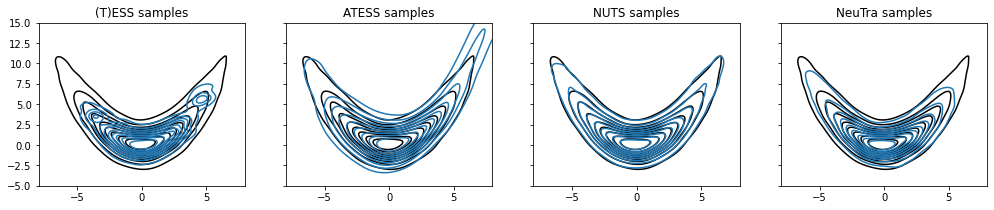

In [17]:
#epoch 1 (flow)
compare_plot_contour(banana_fn, ess, atess_flow, nuts, neutra_flow)

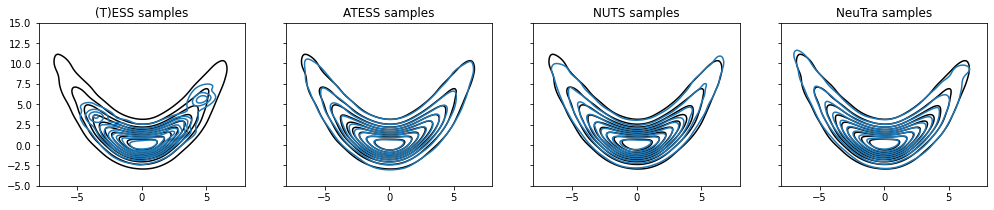

In [11]:
#epoch 2
compare_plot_contour(banana_fn, ess, atess, nuts, neutra)

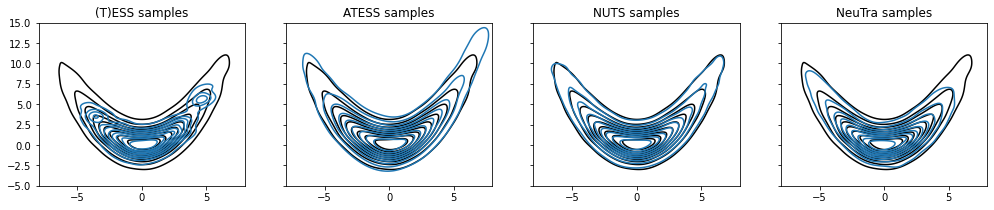

In [12]:
#epoch 2 (flow)
compare_plot_contour(banana_fn, ess, atess_flow, nuts, neutra_flow)

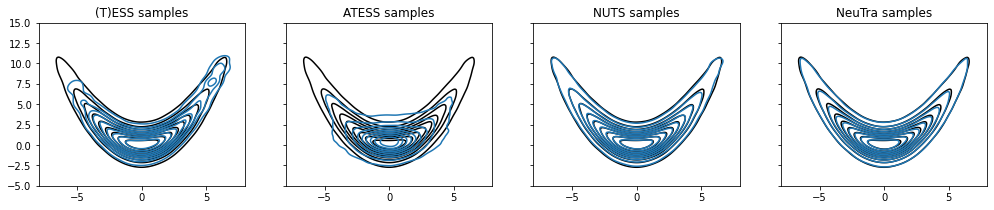

In [32]:
#epoch 0 with tol=0.01 neutra same as bottom two
compare_plot_contour(banana_fn, ess, atess, nuts, neutra)

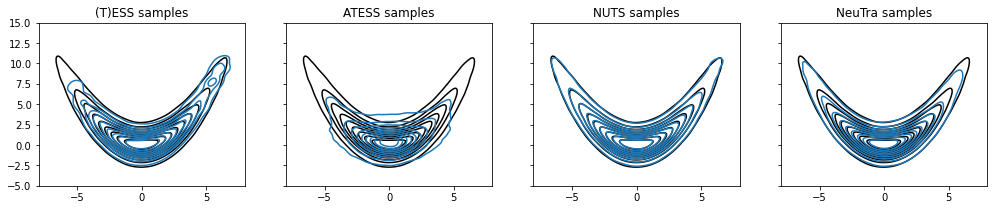

In [26]:
#epoch 0
compare_plot_contour(banana_fn, ess, atess, nuts, neutra)

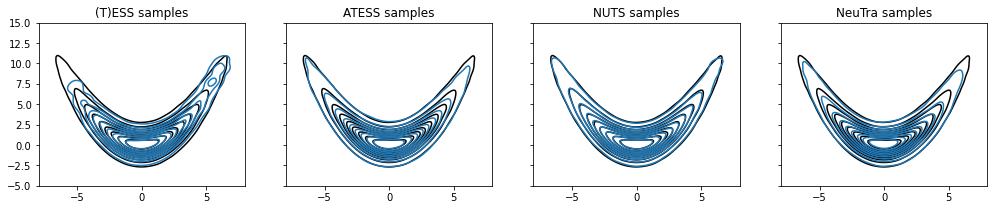

In [7]:
#epoch 1
compare_plot_contour(banana_fn, ess, atess, nuts, neutra)

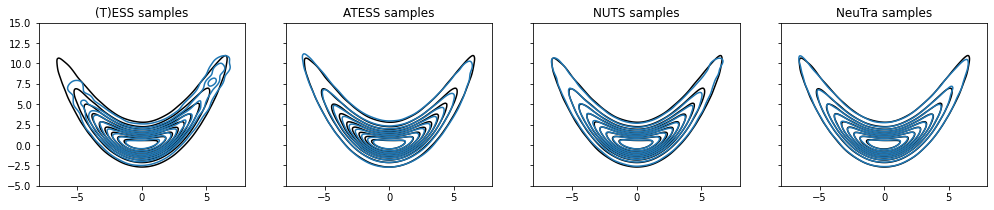

In [14]:
#epoch 2
compare_plot_contour(banana_fn, ess, atess, nuts, neutra)

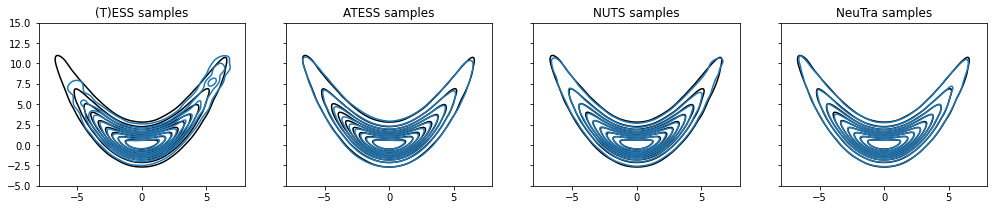

In [17]:
#epoch 3
compare_plot_contour(banana_fn, ess, atess, nuts, neutra)

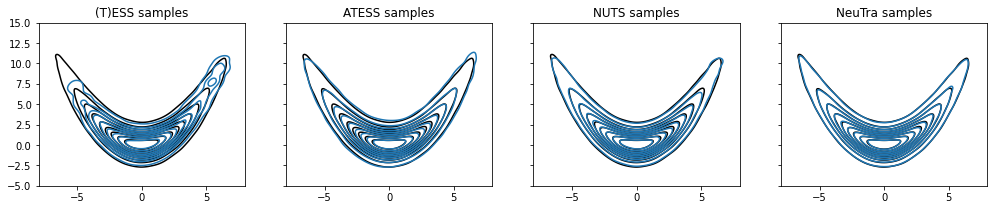

In [20]:
#epoch 4
compare_plot_contour(banana_fn, ess, atess, nuts, neutra)

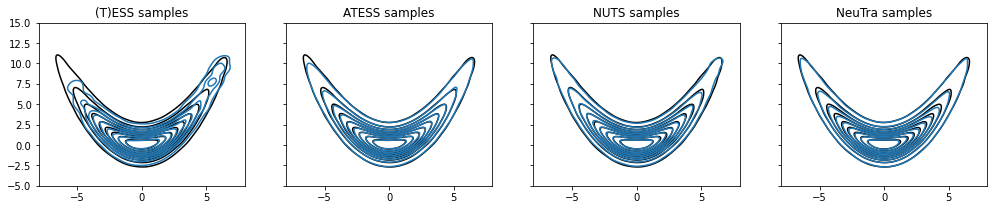

In [29]:
#epoch 4 with tol=0.01 w/ neutra only transformation
compare_plot_contour(banana_fn, ess, atess, nuts, neutra)

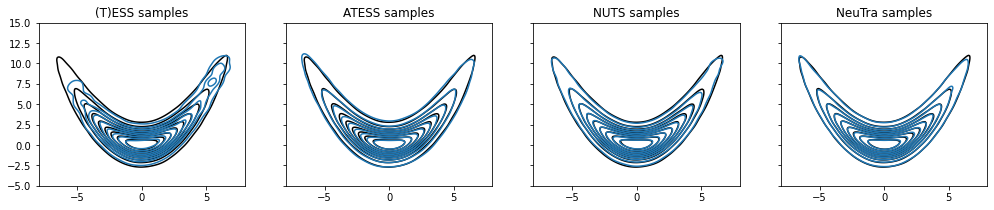

In [23]:
#epoch 5
compare_plot_contour(banana_fn, ess, atess, nuts, neutra)

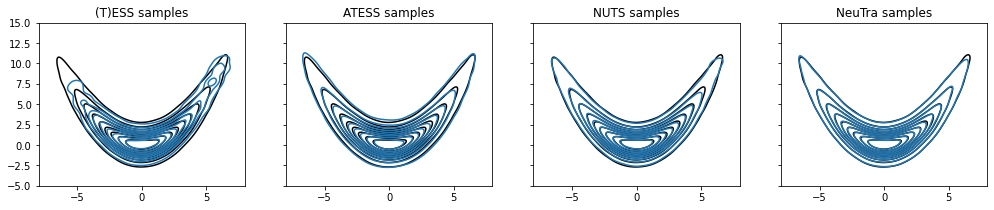

In [10]:
#epoch 6
compare_plot_contour(banana_fn, ess, atess, nuts, neutra)

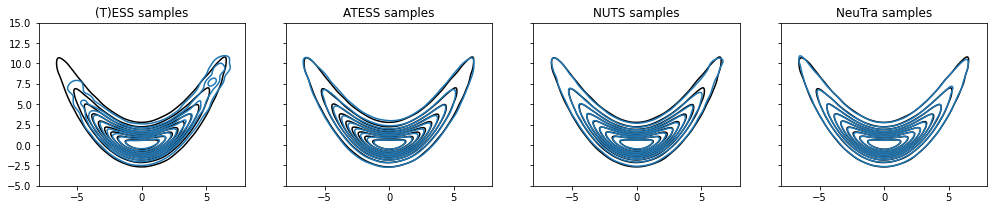

In [13]:
#epoch 7
compare_plot_contour(banana_fn, ess, atess, nuts, neutra)

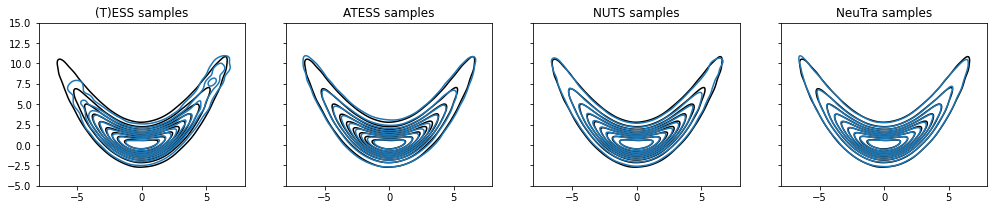

In [16]:
#epoch 8
compare_plot_contour(banana_fn, ess, atess, nuts, neutra)

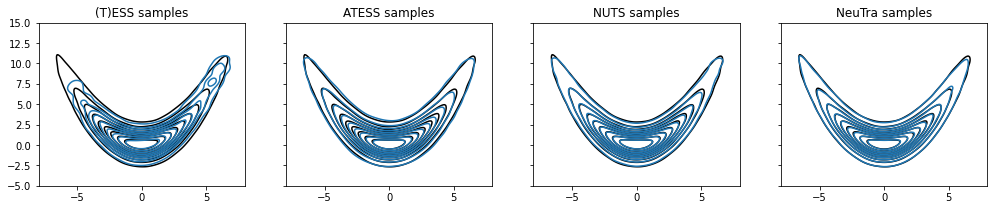

In [23]:
#epoch 9
compare_plot_contour(banana_fn, ess, atess, nuts, neutra)

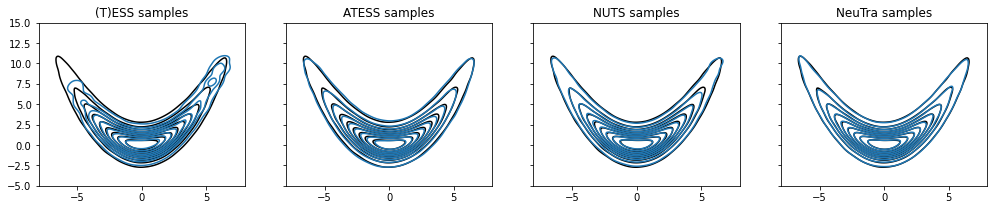

In [20]:
#epoch 10
compare_plot_contour(banana_fn, ess, atess, nuts, neutra)

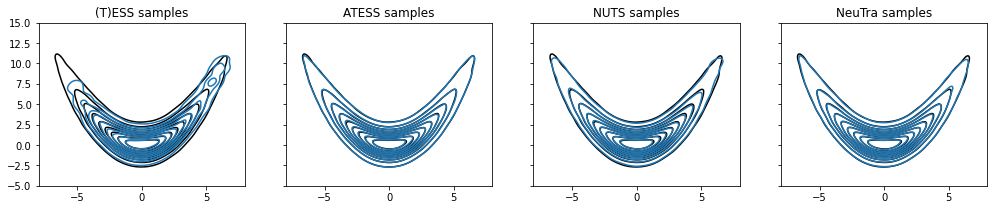

In [6]:
#samplers
compare_plot_contour(banana_fn, ess, atess, nuts, neutra)

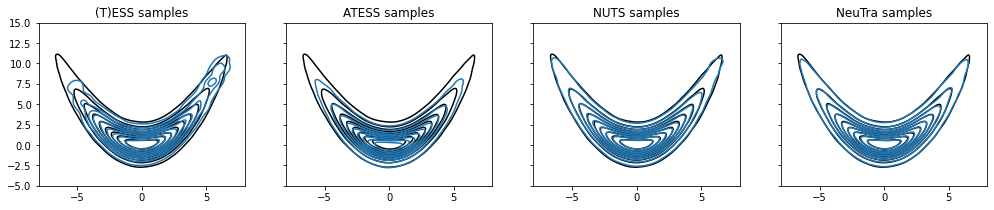

In [8]:
#prev_samplers
compare_plot_contour(banana_fn, ess, atess, nuts, neutra)

In [6]:
from kernels import atransp_elliptical_slice, elliptical_slice, neutra
from mcmc_utils import inference_loop, inference_loop0

import optax
import jax.random as jrnd

from distributions import Banana

2022-06-02 15:42:13.584339: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory


In [7]:
n_epochs = 10
batch_iter, batch_size = 1, 16
maxiter = 10
non_lin = 'tanh'
n_hidden = [2] * 2
n_flow = 4
norm = False
schedule = optax.exponential_decay(init_value=1e-2,
    transition_steps=4e3, decay_rate=.1, transition_begin=1e3)
# schedule = 1e-3
optim = optax.adam(schedule)
tol = 1

In [8]:
dist = Banana()
ksam, kinit = jrnd.split(jrnd.PRNGKey(0))
dist.initialize_model(kinit, 1)

In [9]:
atess, warm_fn = atransp_elliptical_slice(banana_fn, optim, 2, n_flow, n_hidden, jax.nn.tanh, norm)

In [10]:
init_params = jax.tree_map(lambda x: x[0], dist.init_params)

In [13]:
kinit, kwarm, ksam = jrnd.split(jrnd.PRNGKey(0), 3)
state, param, err = atess.init(kinit, init_params, batch_size, batch_iter, tol, maxiter)

In [12]:
(state, param), error = warm_fn(kwarm, state, param, n_epochs, batch_size, batch_iter, tol, maxiter)

[560.21075   107.6953     79.088745   51.63067     5.7295456   5.8667493
   5.2351837   4.567328    4.1670933   3.4029303]
[2.0318248 2.0069728 1.1352646 2.0326068 1.3862317 1.3588692 2.3296547
 3.1675029 1.7902476 2.9013343]
[2.457316  3.6508918 1.2588388 1.4811151 2.3973927 1.4857359 3.6214767
 1.0454943 1.2832286 1.1621099]
[1.4658166  1.3088279  1.0060157  0.80148864 0.74903554 1.4479316
 1.10093    0.7830591  0.87945545 0.80441463]
[2.7821481  1.1682211  1.0367594  2.563276   0.85826105 0.694561
 0.81564945 1.5376596  1.0330542  1.0087045 ]
[1.1745964  0.85156316 1.6173804  0.8813422  1.0771536  0.63093734
 1.3048317  1.1142592  1.7203716  0.99916995]
[0.7473807  0.72530204 0.98147064 0.7996463  0.898544   0.83860564
 1.2774476  0.7324589  0.9933001  1.1273209 ]
[0.8006045  0.6661008  1.0672207  0.87609124 0.8047608  0.58818626
 1.157235   1.2329577  0.7484733  0.5805767 ]
[0.6278907  0.80845624 0.77969164 0.5470097  0.67739993 1.0462775
 1.1032501  1.120028   1.0550314  0.7446211

In [14]:
from flows import coupling_dense
(
    param_init, flow, flow_inv, reverse_kld, forward_kld
) = coupling_dense(banana_fn, 2, n_flow, n_hidden, jax.nn.tanh, norm)

_, unraveler_fn = jax.flatten_util.ravel_pytree(init_params)
def generate(k, params):
    ku, kv = jax.random.split(k)
    u = unraveler_fn(jax.random.normal(ku, (2,)))
    v = jax.random.normal(kv, (2,))
    return flow(u, v, params)[0]

init = jax.vmap(lambda k: generate(k, param))(jax.random.split(ksam, 2000))
uno = jax.vmap(lambda k: generate(k, error[0]))(jax.random.split(ksam, 2000))
dos = jax.vmap(lambda k: generate(k, error[1]))(jax.random.split(ksam, 2000))
tres = jax.vmap(lambda k: generate(k, error[2]))(jax.random.split(ksam, 2000))
quat = jax.vmap(lambda k: generate(k, error[3]))(jax.random.split(ksam, 2000))
cinc = jax.vmap(lambda k: generate(k, error[4]))(jax.random.split(ksam, 2000))
seis = jax.vmap(lambda k: generate(k, error[5]))(jax.random.split(ksam, 2000))
siete = jax.vmap(lambda k: generate(k, error[6]))(jax.random.split(ksam, 2000))
ocho = jax.vmap(lambda k: generate(k, error[7]))(jax.random.split(ksam, 2000))
nueve = jax.vmap(lambda k: generate(k, error[8]))(jax.random.split(ksam, 2000))
diez = jax.vmap(lambda k: generate(k, error[9]))(jax.random.split(ksam, 2000))

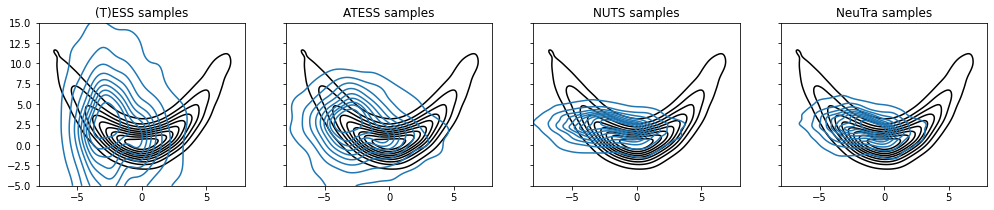

In [15]:
#new param 1x5k
compare_plot_contour(banana_fn, init, uno, dos, tres)

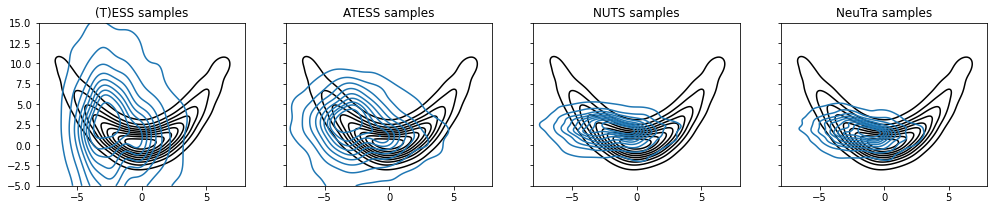

In [56]:
#new param 1x5k
compare_plot_contour(banana_fn, init, uno, dos, tres)

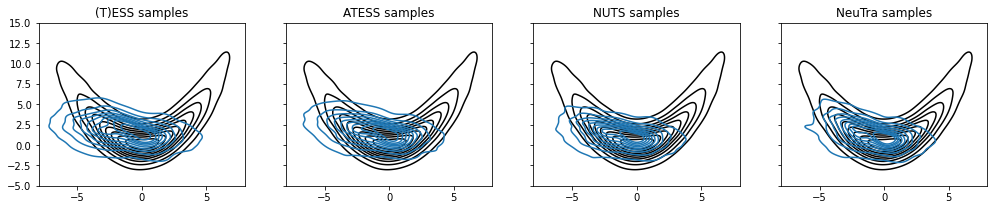

In [16]:
#new param 1x5k
compare_plot_contour(banana_fn, quat, cinc, seis, siete)

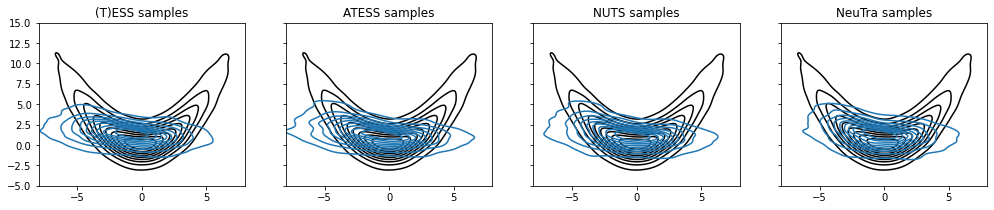

In [47]:
#new param 1x5k
compare_plot_contour(banana_fn, quat, cinc, seis, siete)

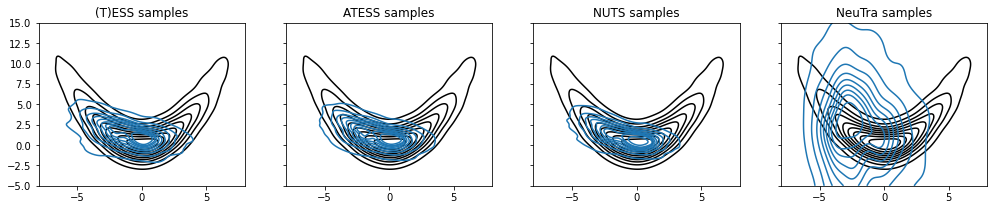

In [17]:
#new param 1x5k
compare_plot_contour(banana_fn, ocho, nueve, diez, init)

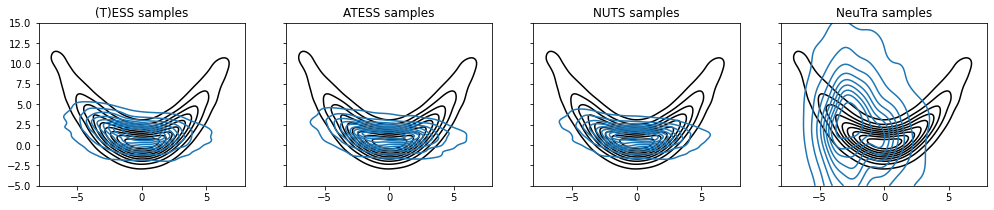

In [55]:
#new param 1x5k
compare_plot_contour(banana_fn, ocho, nueve, diez, init)